### importing libraries 


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics #how aacurate our model is



### loading csv as a pandas dataframe

In [10]:
gold_data= pd.read_csv("D:\ds\gld_price_data.csv")

### print data

In [11]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


#### trying to predict the gold price w SLV, SPX, USO, EUR/USD

In [12]:
gold_data.size

13740

In [13]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [14]:
gold_data.shape

(2290, 6)

In [15]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### check missing values

In [16]:
gold_data.isnull().sum()   # hence no missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### stats



In [17]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## correlation 

#### 1 positive correlation = A inc ---> B inc 
#### 2 negative correlation= A inc ----> B dec

In [18]:
correlation = gold_data.corr()

<AxesSubplot:>

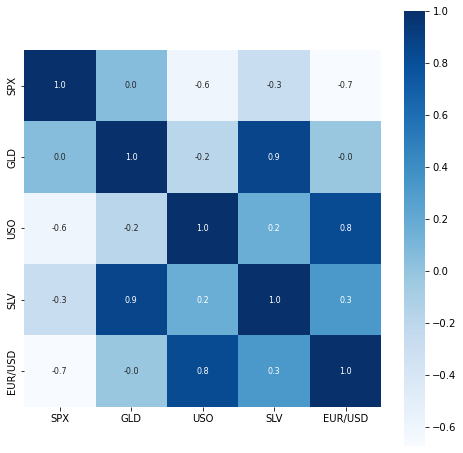

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar= True, square=True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap= 'Blues')

In [20]:
#printing correlation values for gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Shereen Gauba\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

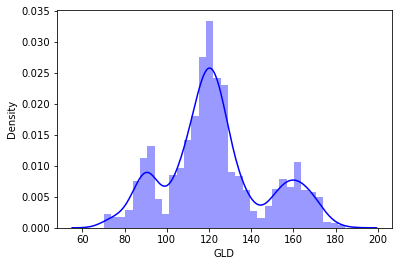

In [21]:
#Checking the price of gold - distribution 

sns.distplot(gold_data['GLD'], color='blue')

# splitting the features (SPX, USO, SLV, EUR/USD) and target (GLD)

In [22]:
X= gold_data.drop(['Date', 'GLD'], axis=1)
y= gold_data['GLD']

In [23]:
print (X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print (y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# split into train and test


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

# model training - random forest regressor 

In [26]:
regressor = RandomForestRegressor(n_estimators=100) #n_estimators is the no. of trees


In [27]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

## model evaluation

In [28]:
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.49249913  82.09729973 115.98399982 127.4819005  120.76750156
 154.74459731 150.2914981  126.2222004  117.56849862 126.15399997
 116.63970124 172.34380097 141.52969855 167.81639957 115.29430017
 117.79390046 139.67260299 169.93640083 159.57440273 156.16279988
 155.17270074 125.32379975 175.95770032 157.2970038  125.12570048
  93.78029954  77.34510025 120.63230009 119.04969897 167.53050028
  88.04830092 125.27140049  91.02370061 117.66520006 121.10709922
 137.52670164 115.55200112 114.96700053 147.21619999 107.16150102
 104.86120252  87.01579762 126.41830044 117.68029995 152.32929838
 119.66520014 108.52679985 107.81509827  93.21190035 126.99139802
  74.61010037 113.69499921 121.35400018 111.42509901 118.91239895
 120.62749949 159.8214005  168.23920106 146.8596963   85.94859904
  94.25000044  86.93369924  90.55750036 119.05260063 126.42140058
 127.62229967 169.67089976 122.18439934 117.29639908  98.39260013
 168.85530109 143.01809776 132.11160231 121.29590241 121.65409965
 119.64660

In [30]:
error_score= metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.9887116674788213


## plot - actual vs predicted

In [31]:
y_test= list(y_test)


Text(0, 0.5, 'GLD price')

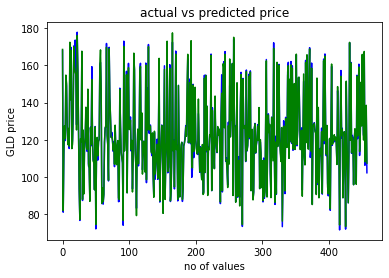

In [32]:
plt.plot(y_test, color= 'Blue', label='actual value')
plt.plot(test_data_prediction, color= 'green', label= 'predicted value')
plt.title('actual vs predicted price')
plt.xlabel('no of values')
plt.ylabel('GLD price')


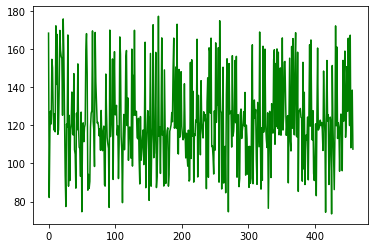

In [33]:
plt.plot(test_data_prediction, color= 'green', label= 'predicted value')

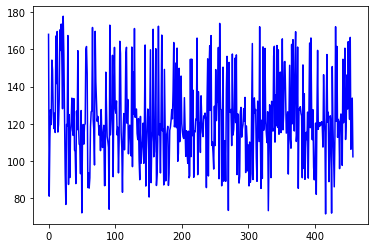

In [34]:
plt.plot(y_test, color= 'Blue', label='actual value')